<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/PCOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCOD ANALYSIS USING MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df=pd.read_excel('/content/A STATISTICAL STUDY ON WOMEN HEALTH PROBLEMS  (Responses) (1).xlsx')
df.head()

,Age,Native Place,married,water,exercise,Walking regularly,sports activities,Food habit,fast food,blood flow during menstrual cycle,...,anemic person,consult the Doctor for this problem,reason of irregular period diagnose,PCOD\PCOS,relatives PCOD/PCOS,Thyroid disease,diabetes problem,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,22.0,Rural,NaN,2-3 ltr,Daily,No,No,Non-Vegetarian,No,Regular,...,No,No,change of lifestyle,No,No,No,No,NaN,NaN,NaN
1,21.0,Urban,NaN,2-3 ltr,Alternative Day,Yes,No,Vegetarian,No,Severe,...,Yes,Yes,Due to improper diet and food habits,No,No,Yes,No,NaN,NaN,NaN
2,22.0,Rural,Yes,2-3 ltr,Nill,No,No,Non-Vegetarian,Rarely,Regular,...,No,No,change of lifestyle,No,No,No,No,NaN,NaN,NaN
3,23.0,Rural,Yes,2-3 ltr,Once in a week,Yes,No,Non-Vegetarian,Yes,Light,...,No,No,Due to stress,No,No,Yes,No,NaN,NaN,NaN
4,24.0,Rural,No,2-3 ltr,Nill,Yes,No,Vegetarian,Rarely,Regular,...,No,Yes,Due to stress,No,No,No,No,NaN,NaN,NaN


In [ ]:
dlt=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']
df.drop(dlt,axis=1,inplace=True)

In [ ]:
df.shape

(744, 21)

There are 744 instance with 21 feature

In [ ]:
df.columns

Index(['Age', 'Native Place', 'married', 'water', 'exercise',
       'Walking regularly', 'sports activities', 'Food habit', 'fast food',
       'blood flow during menstrual cycle', 'Irregular periods',
       'symptoms of mensuration', 'fungal infection', 'urinary infection ',
       'anemic person ', 'consult the Doctor for this problem',
       'reason of irregular period diagnose', 'PCOD\PCOS',
       'relatives  PCOD/PCOS ', 'Thyroid disease', ' diabetes problem'],
      dtype='object')

In [ ]:
df.duplicated().sum()

61

The data has 61 duplicated values

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(683, 21)

After remove duplicated datas, we have 683 instance and 21 feature

In [ ]:
numerical = len(df.select_dtypes(include=['int64', 'float64']).columns)
categorical = len(df.select_dtypes(include=['object']).columns)
print("Number of numerical features :", numerical)
print("Number of categorical features :", categorical)

Number of numerical features : 1
Number of categorical features : 20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 743
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  680 non-null    float64
 1   Native Place                         678 non-null    object 
 2   married                              680 non-null    object 
 3   water                                683 non-null    object 
 4   exercise                             683 non-null    object 
 5   Walking regularly                    681 non-null    object 
 6   sports activities                    680 non-null    object 
 7   Food habit                           682 non-null    object 
 8   fast food                            682 non-null    object 
 9   blood flow during menstrual cycle    683 non-null    object 
 10  Irregular periods                    683 non-null    object 
 11  symptoms of mensuration         

In [ ]:
df.isnull().sum()

Age                                     3
Native Place                            5
married                                 3
water                                   0
exercise                                0
Walking regularly                       2
sports activities                       3
Food habit                              1
fast food                               1
blood flow during menstrual cycle       0
Irregular periods                       0
symptoms of mensuration                 0
fungal infection                        2
urinary infection                      10
anemic person                           3
consult the Doctor for this problem     7
reason of irregular period diagnose    39
PCOD\PCOS                               0
relatives  PCOD/PCOS                    0
Thyroid disease                         0
 diabetes problem                       1
dtype: int64

In [ ]:
df.nunique()

Age                                    20
Native Place                            2
married                                 2
water                                   3
exercise                                4
Walking regularly                       2
sports activities                       2
Food habit                              3
fast food                               3
blood flow during menstrual cycle       4
Irregular periods                       2
symptoms of mensuration                 6
fungal infection                        2
urinary infection                       2
anemic person                           2
consult the Doctor for this problem     2
reason of irregular period diagnose     4
PCOD\PCOS                               2
relatives  PCOD/PCOS                    2
Thyroid disease                         2
 diabetes problem                       2
dtype: int64

# PREPROCESS

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
for i in df.columns:
    df[i].fillna(df[i].mode(),inplace=True)


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.value_counts(['Native Place'])

Native Place
Rural           352
Urban           273
dtype: int64

In [ ]:
df.value_counts(['married'])

married
No         521
Yes        104
dtype: int64

In [ ]:
df.value_counts(['water'])

water          
2-3 ltr            313
less than 2 ltr    175
more than 3 ltr    137
dtype: int64

In [ ]:
df.value_counts(['exercise'])

exercise       
Nill               307
Once in a week     124
Alternative Day    107
Daily               87
dtype: int64

In [ ]:
df.value_counts(['Food habit'])

Food habit                
Non-Vegetarian                503
Vegetarian                     88
Ova-Vegetarian (Egg only)      34
dtype: int64

In [ ]:
df.value_counts(['fast food'])

fast food
Yes          466
Rarely        80
No            79
dtype: int64

In [ ]:
df.value_counts(['sports activities'])

sports activities
No                   414
Yes                  211
dtype: int64

In [ ]:
df.value_counts(['Irregular periods'])

Irregular periods
Yes                  320
No                   305
dtype: int64

In [ ]:
#df.value_counts(['symptoms '])

In [ ]:
df.value_counts(['blood flow during menstrual cycle'])

blood flow during menstrual cycle
Regular                              465
Light                                 96
Severe                                44
Spotting                              20
dtype: int64

In [ ]:
df.value_counts(['reason of irregular period diagnose'])

reason of irregular period diagnose 
Due to stress                           289
Hormonal Imbalance                      169
Due to improper diet and food habits     99
change of lifestyle                      68
dtype: int64

In [ ]:
df.value_counts(['symptoms of mensuration'])

symptoms of mensuration 
All                         215
Back Pain                   196
Joint Pain                  102
Abdomen Pain                 71
Breast heaviness             34
Diarrhea or constipation      7
dtype: int64

In [ ]:
df.value_counts(['PCOD\PCOS'])

PCOD\PCOS
No           473
Yes          152
dtype: int64

In [ ]:
df.value_counts(['relatives  PCOD/PCOS '])

relatives  PCOD/PCOS 
No                       502
Yes                      123
dtype: int64

In [ ]:
df.value_counts(['fungal infection'])

fungal infection
No                  458
Yes                 167
dtype: int64

In [ ]:
df.value_counts(['urinary infection '])

urinary infection 
No                    450
Yes                   175
dtype: int64

In [ ]:
df.value_counts(['anemic person '])

anemic person 
No                418
Yes               207
dtype: int64

In [ ]:
df.value_counts(['Thyroid disease'])

Thyroid disease
No                 525
Yes                100
dtype: int64

In [ ]:
df.value_counts([' diabetes problem'])

 diabetes problem
No                   559
Yes                   66
dtype: int64

In [ ]:
df.value_counts(['consult the Doctor for this problem'])

consult the Doctor for this problem
No                                     413
Yes                                    212
dtype: int64

In [ ]:
df.describe()

,Age
count,625.000000
mean,22.369631
std,2.616195
min,15.000000
25%,21.000000
50%,22.000000
75%,23.000000
max,45.000000


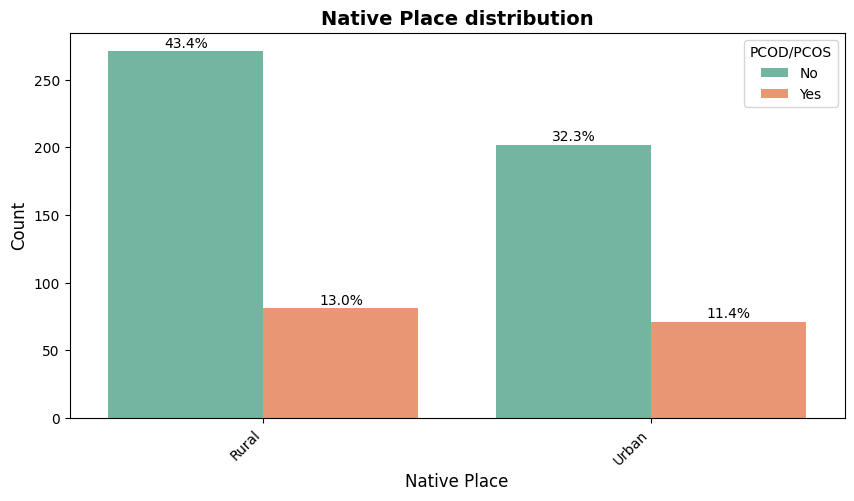

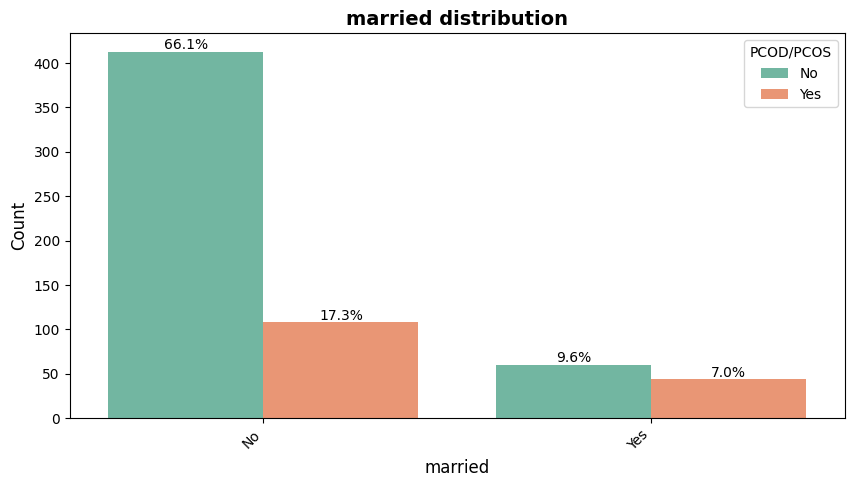

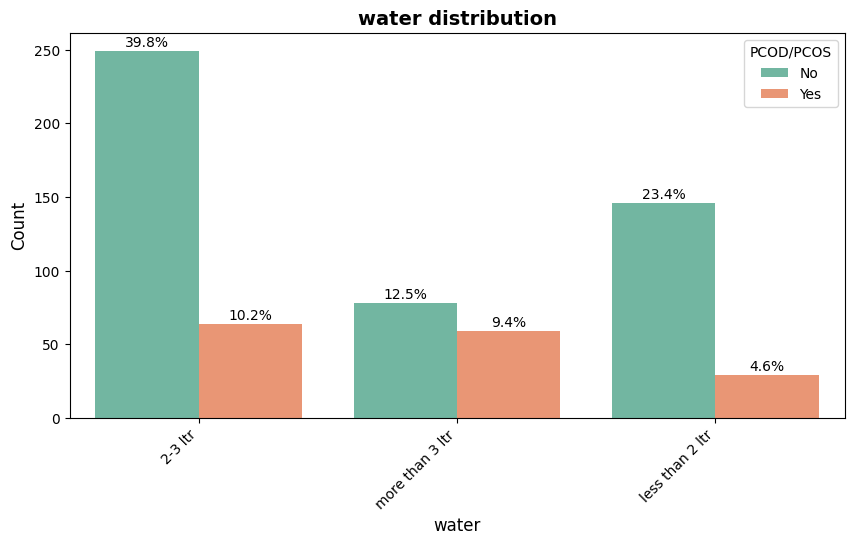

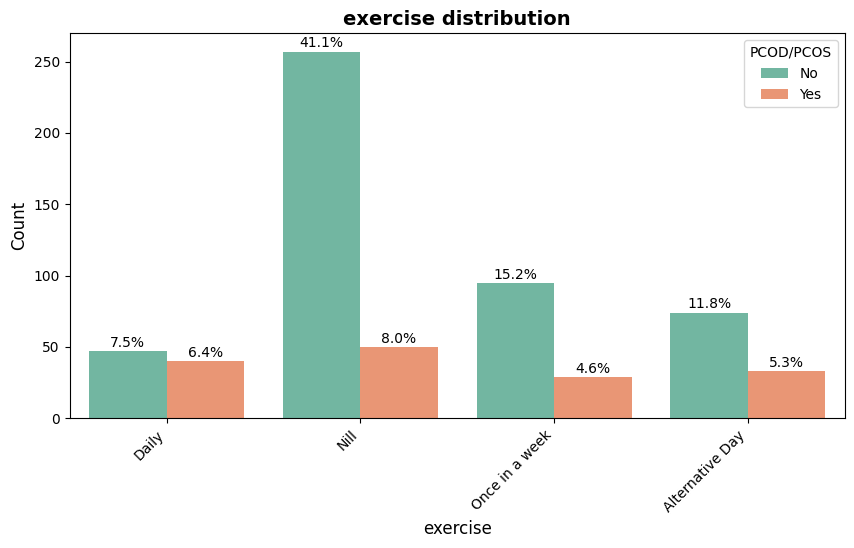

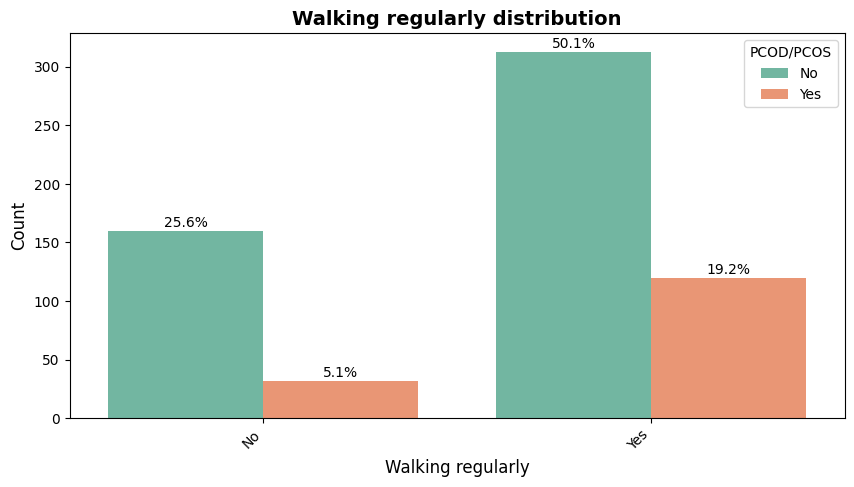

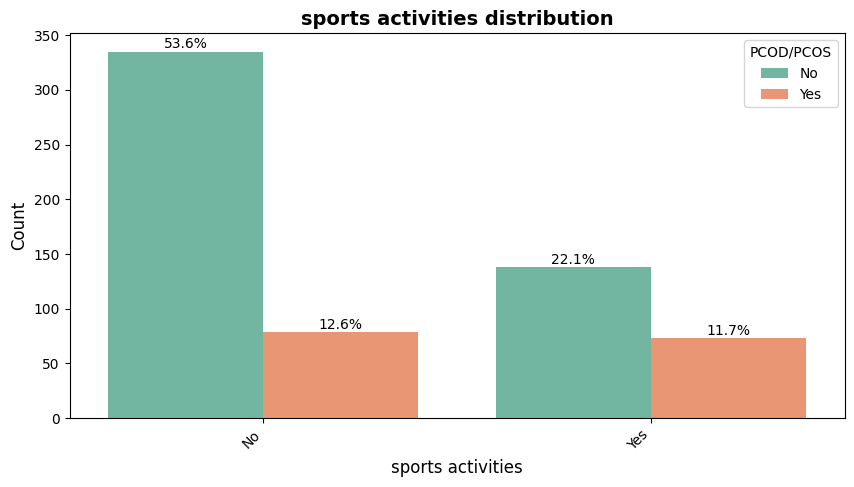

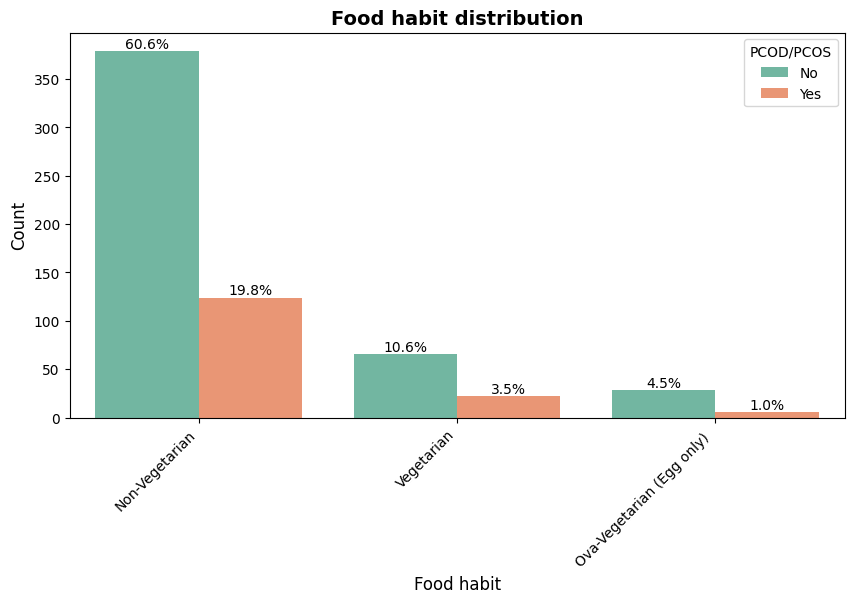

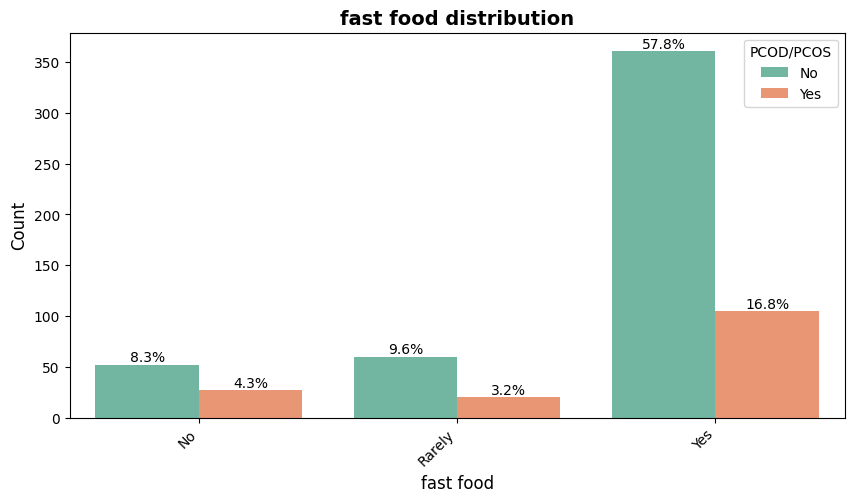

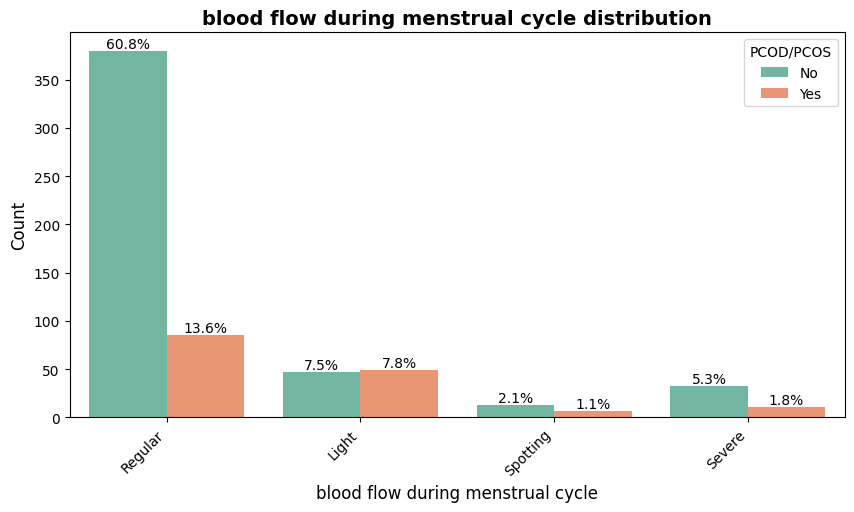

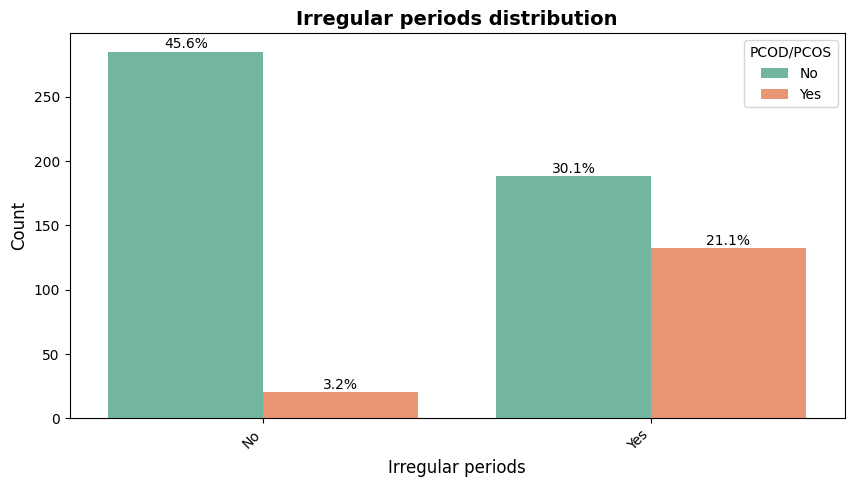

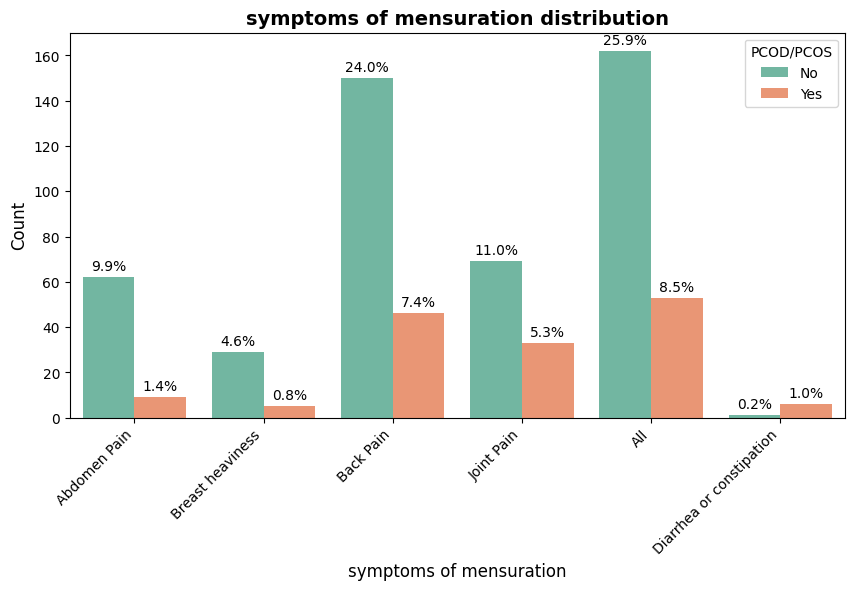

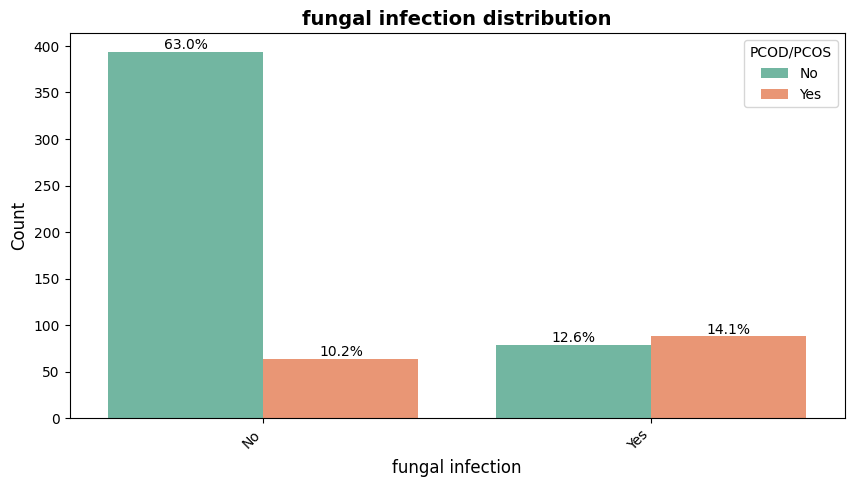

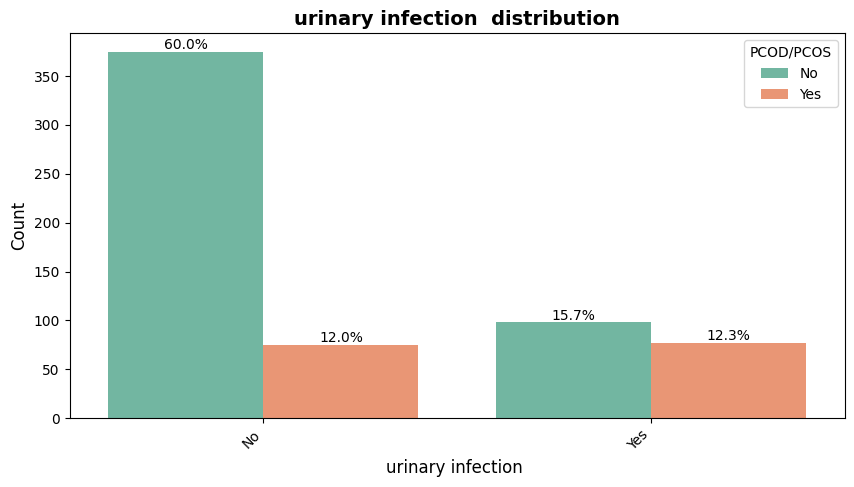

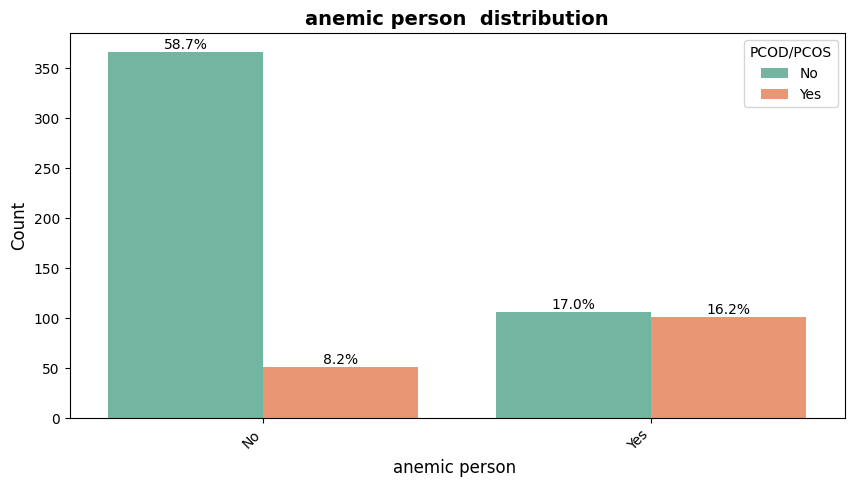

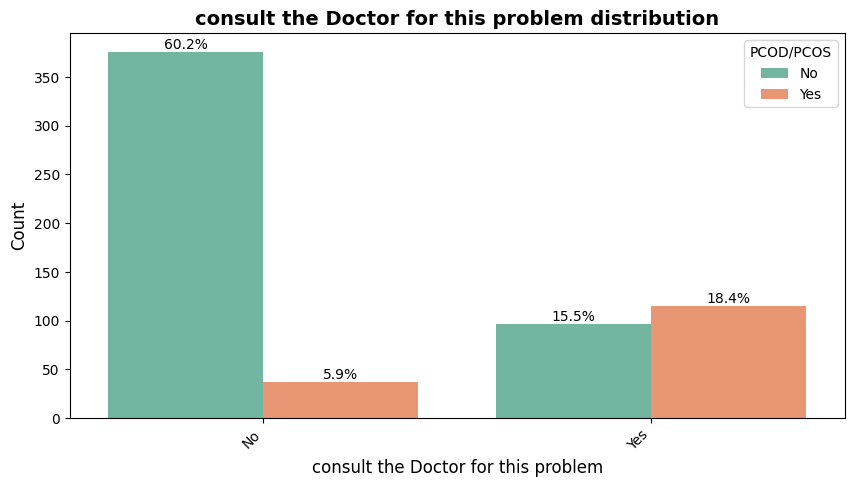

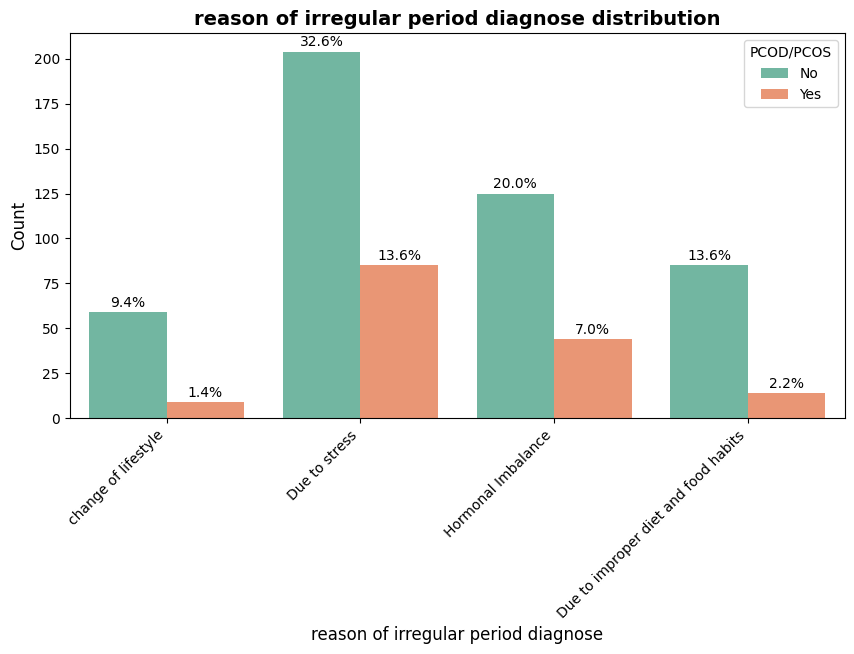

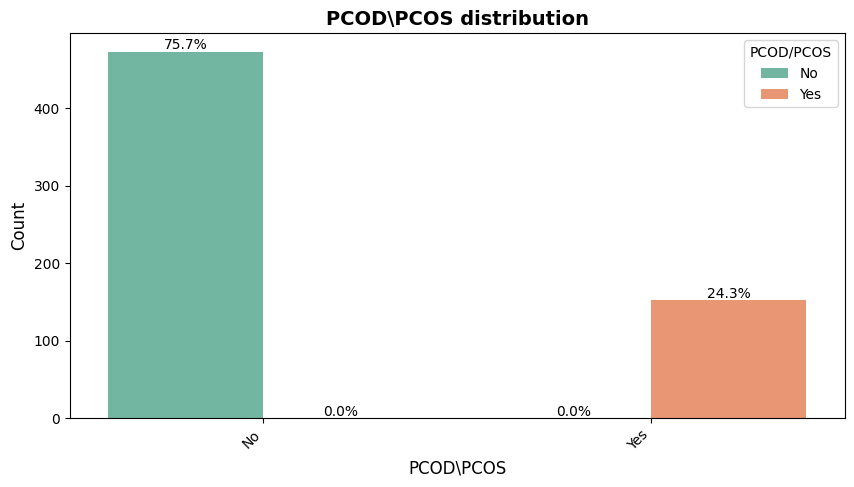

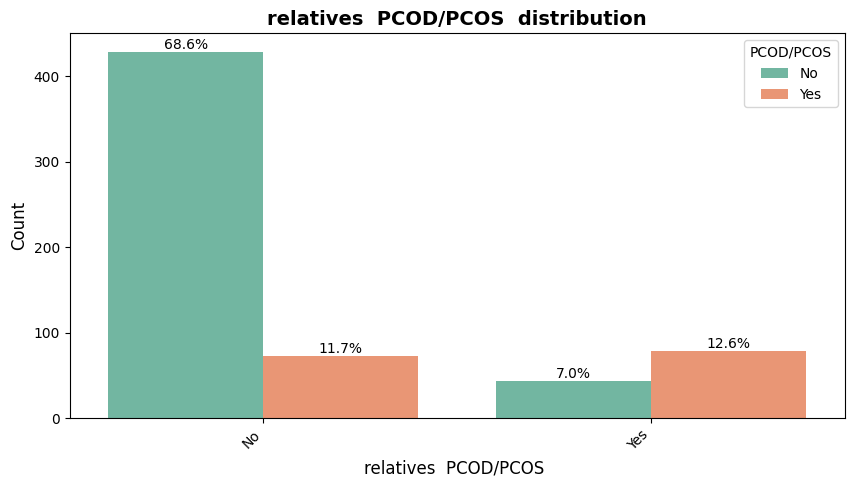

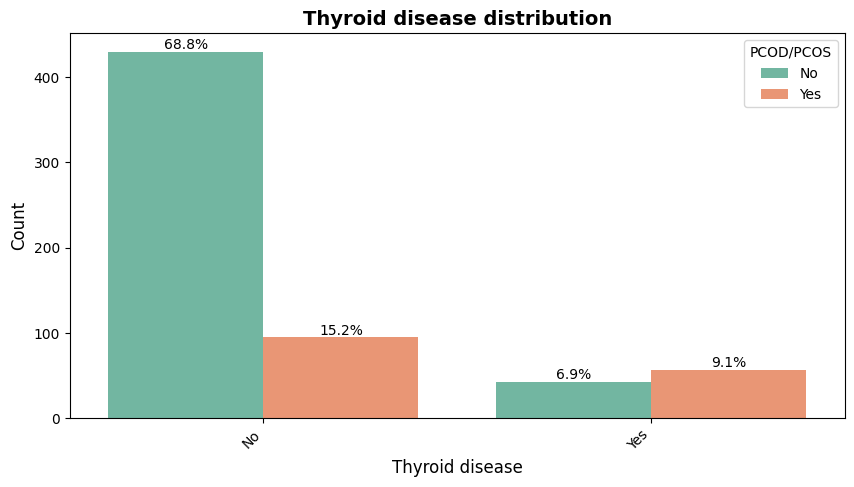

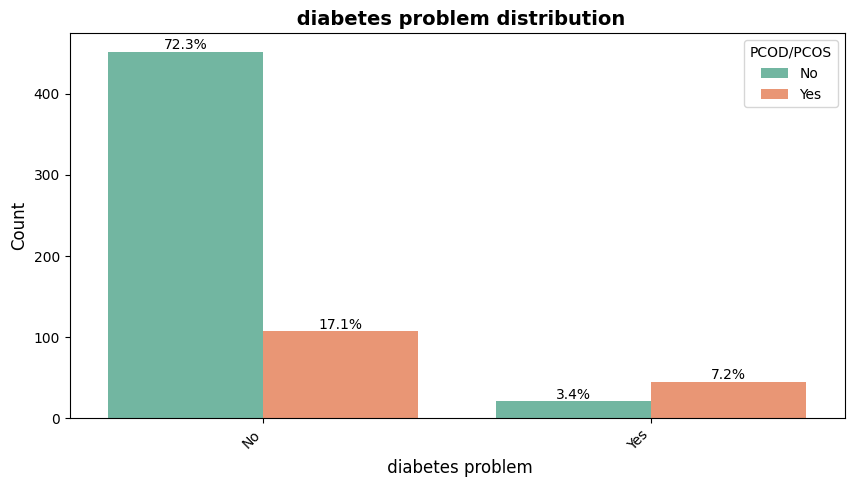

In [ ]:
feature=['Native Place', 'married', 'water', 'exercise',
       'Walking regularly', 'sports activities', 'Food habit', 'fast food',
       'blood flow during menstrual cycle', 'Irregular periods',
       'symptoms of mensuration', 'fungal infection', 'urinary infection ',
       'anemic person ', 'consult the Doctor for this problem',
       'reason of irregular period diagnose',
       'relatives  PCOD/PCOS ', 'Thyroid disease', ' diabetes problem']

def plot_countplot_with_perc(df, feature):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=feature, data=df, hue='PCOD\PCOS', palette='Set2')
    plt.title(f"{feature} distribution", fontsize=14, fontweight="bold")
    plt.xlabel(f"{feature}", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')  # rotate x-axis labels
    ax.legend(title='PCOD/PCOS', loc='upper right')  # add legend

    # add percentage labels to each bar
    total = float(len(df[feature]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:.1f}%'.format((height/total)*100),
                ha="center")
    plt.show()
for col in df.select_dtypes(include=["object"]).columns:
    plot_countplot_with_perc(df, col)
    plt.show()

<Axes: xlabel='PCOD\\PCOS', ylabel='Age'>

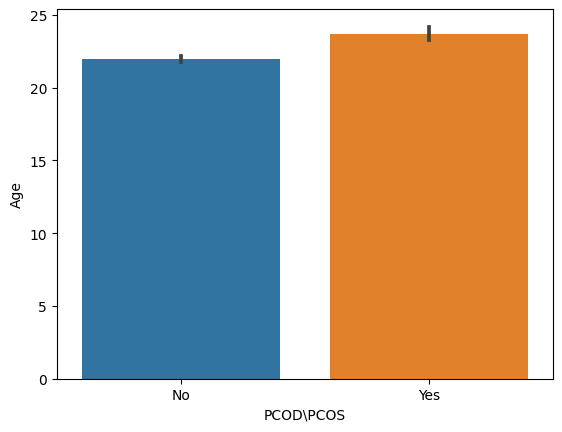

In [ ]:
sns.barplot(y='Age',x='PCOD\PCOS',data=df)

In [ ]:
filtered_df = df[df['PCOD\PCOS'] == 'Yes']
grouped = filtered_df.groupby('Age').size().reset_index(name='count')
top_5 = grouped.nlargest(5, 'count')
print(top_5)


    Age  count
5  22.0     39
7  24.0     20
8  25.0     19
4  21.0     18
9  26.0     12


In [ ]:

categorical_cols = ['married','Walking regularly', 'sports activities','fast food',
                    'Irregular periods','fungal infection', 'urinary infection ',
                    'anemic person ', 'consult the Doctor for this problem',
                    'relatives  PCOD/PCOS ','Thyroid disease', ' diabetes problem']

total_pcod_count = len(df[df['PCOD\PCOS'] == 'Yes'])
print(f'Total number of people affected by PCOD: {total_pcod_count}')

for col in categorical_cols:
    count = len(df[(df['PCOD\PCOS'] == 'Yes') & (df[col] == 'Yes')])
    percentage = (count / total_pcod_count) * 100
    print(f"{col}: {percentage:.2f}%")


Total number of people affected by PCOD: 152
married: 28.95%
Walking regularly: 78.95%
sports activities: 48.03%
fast food: 69.08%
Irregular periods: 86.84%
fungal infection: 57.89%
urinary infection : 50.66%
anemic person : 66.45%
consult the Doctor for this problem: 75.66%
relatives  PCOD/PCOS : 51.97%
Thyroid disease: 37.50%
 diabetes problem: 29.61%


In [ ]:
total_pcod_count = len(df[df['PCOD\PCOS'] == 'Yes'])
print(f'Total number of people not affected by PCOD: {total_pcod_count}')

for col in categorical_cols:
    count = len(df[(df['PCOD\PCOS'] == 'Yes') & (df[col] == 'No')])
    percentage = (count / total_pcod_count) * 100
    print(f"{col}: {percentage:.2f}%")


Total number of people not affected by PCOD: 152
married: 71.05%
Walking regularly: 21.05%
sports activities: 51.97%
fast food: 17.76%
Irregular periods: 13.16%
fungal infection: 42.11%
urinary infection : 49.34%
anemic person : 33.55%
consult the Doctor for this problem: 24.34%
relatives  PCOD/PCOS : 48.03%
Thyroid disease: 62.50%
 diabetes problem: 70.39%


<Axes: xlabel='Age'>

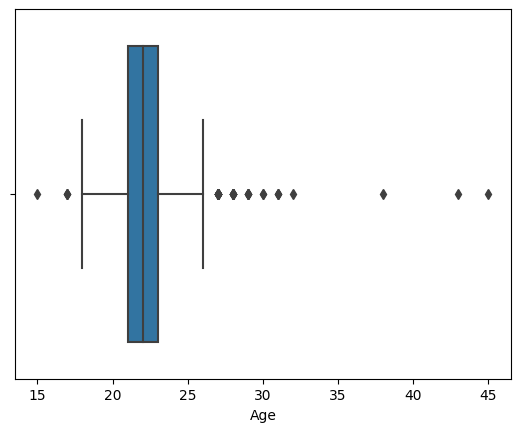

In [ ]:
sns.boxplot(x='Age',data=df)

,Age,Native Place,married,water,exercise,Walking regularly,sports activities,Food habit,fast food,blood flow during menstrual cycle,...,symptoms of mensuration,fungal infection,urinary infection,anemic person,consult the Doctor for this problem,reason of irregular period diagnose,PCOD\PCOS,relatives PCOD/PCOS,Thyroid disease,diabetes problem


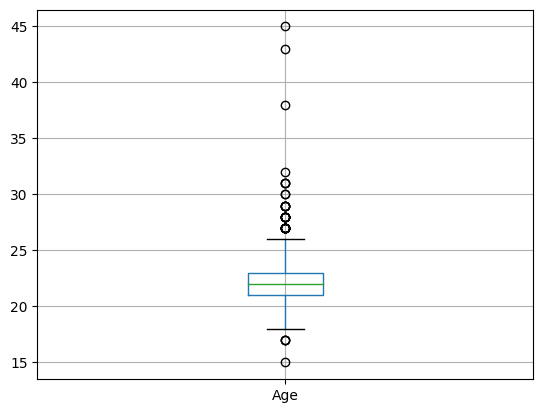

In [ ]:
df.boxplot(column=['Age'])
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5*IQR
Upper_Bound = Q3 + 1.5*IQR
df[(df['Age'] >= Lower_Bound) & (df['Age'] <= Upper_Bound)].head(0)

#Encoding

In [ ]:
df.replace({'PCOD\PCOS':{'Yes':1,'No':0},'Thyroid disease':{'Yes':1,'No':0},'married':{'Yes':1,'No':0},'relatives  PCOD/PCOS ':{'Yes':1,'No':0},' diabetes problem':{'Yes':1,'No':0},'Walking regularly':{'Yes':1,'No':0},'sports activities':{'Yes':1,'No':0},'consult the Doctor for this problem':{'Yes':1,'No':0},'urinary infection ':{'Yes':1,'No':0},'anemic person ':{'Yes':1,'No':0},'fungal infection':{'Yes':1,'No':0},'Irregular periods':{'No':0,'Yes':1}},inplace=True)
df.replace({'Native Place':{'Urban':1,'Rural':2},'water':{'2-3 ltr':1,'less than 2 ltr':2,'more than 3 ltr':3},'exercise':{'Nill':0,'Once in a week':1,'Alternative Day':2,'Daily':3},'symptoms of mensuration':{'All':1,'Back Pain':2,'Joint Pain':3,'Abdomen Pain':4,'Breast heaviness':5,'Diarrhea or constipation':6},'Food habit':{'Non-Vegetarian':1,'Vegetarian':0,'Ova-Vegetarian (Egg only) ':2}},inplace=True)
df.replace({'reason of irregular period diagnose':{'Due to stress':1,'Hormonal Imbalance':2,'Due to improper diet and food habits':3,'change of lifestyle':4}},inplace=True)
df.replace({'blood flow during menstrual cycle':{'Regular':1,'Light':2,'Severe':3,'Spotting':4},'fast food':{'Yes':1,'No':0,'Rarely':2}},inplace=True)

In [ ]:
numerical = len(df.select_dtypes(include=['int64', 'float64']).columns)
categorical = len(df.select_dtypes(include=['object']).columns)
print("Number of numerical features :", numerical)
print("Number of categorical features :", categorical)

Number of numerical features : 21
Number of categorical features : 0


<Axes: >

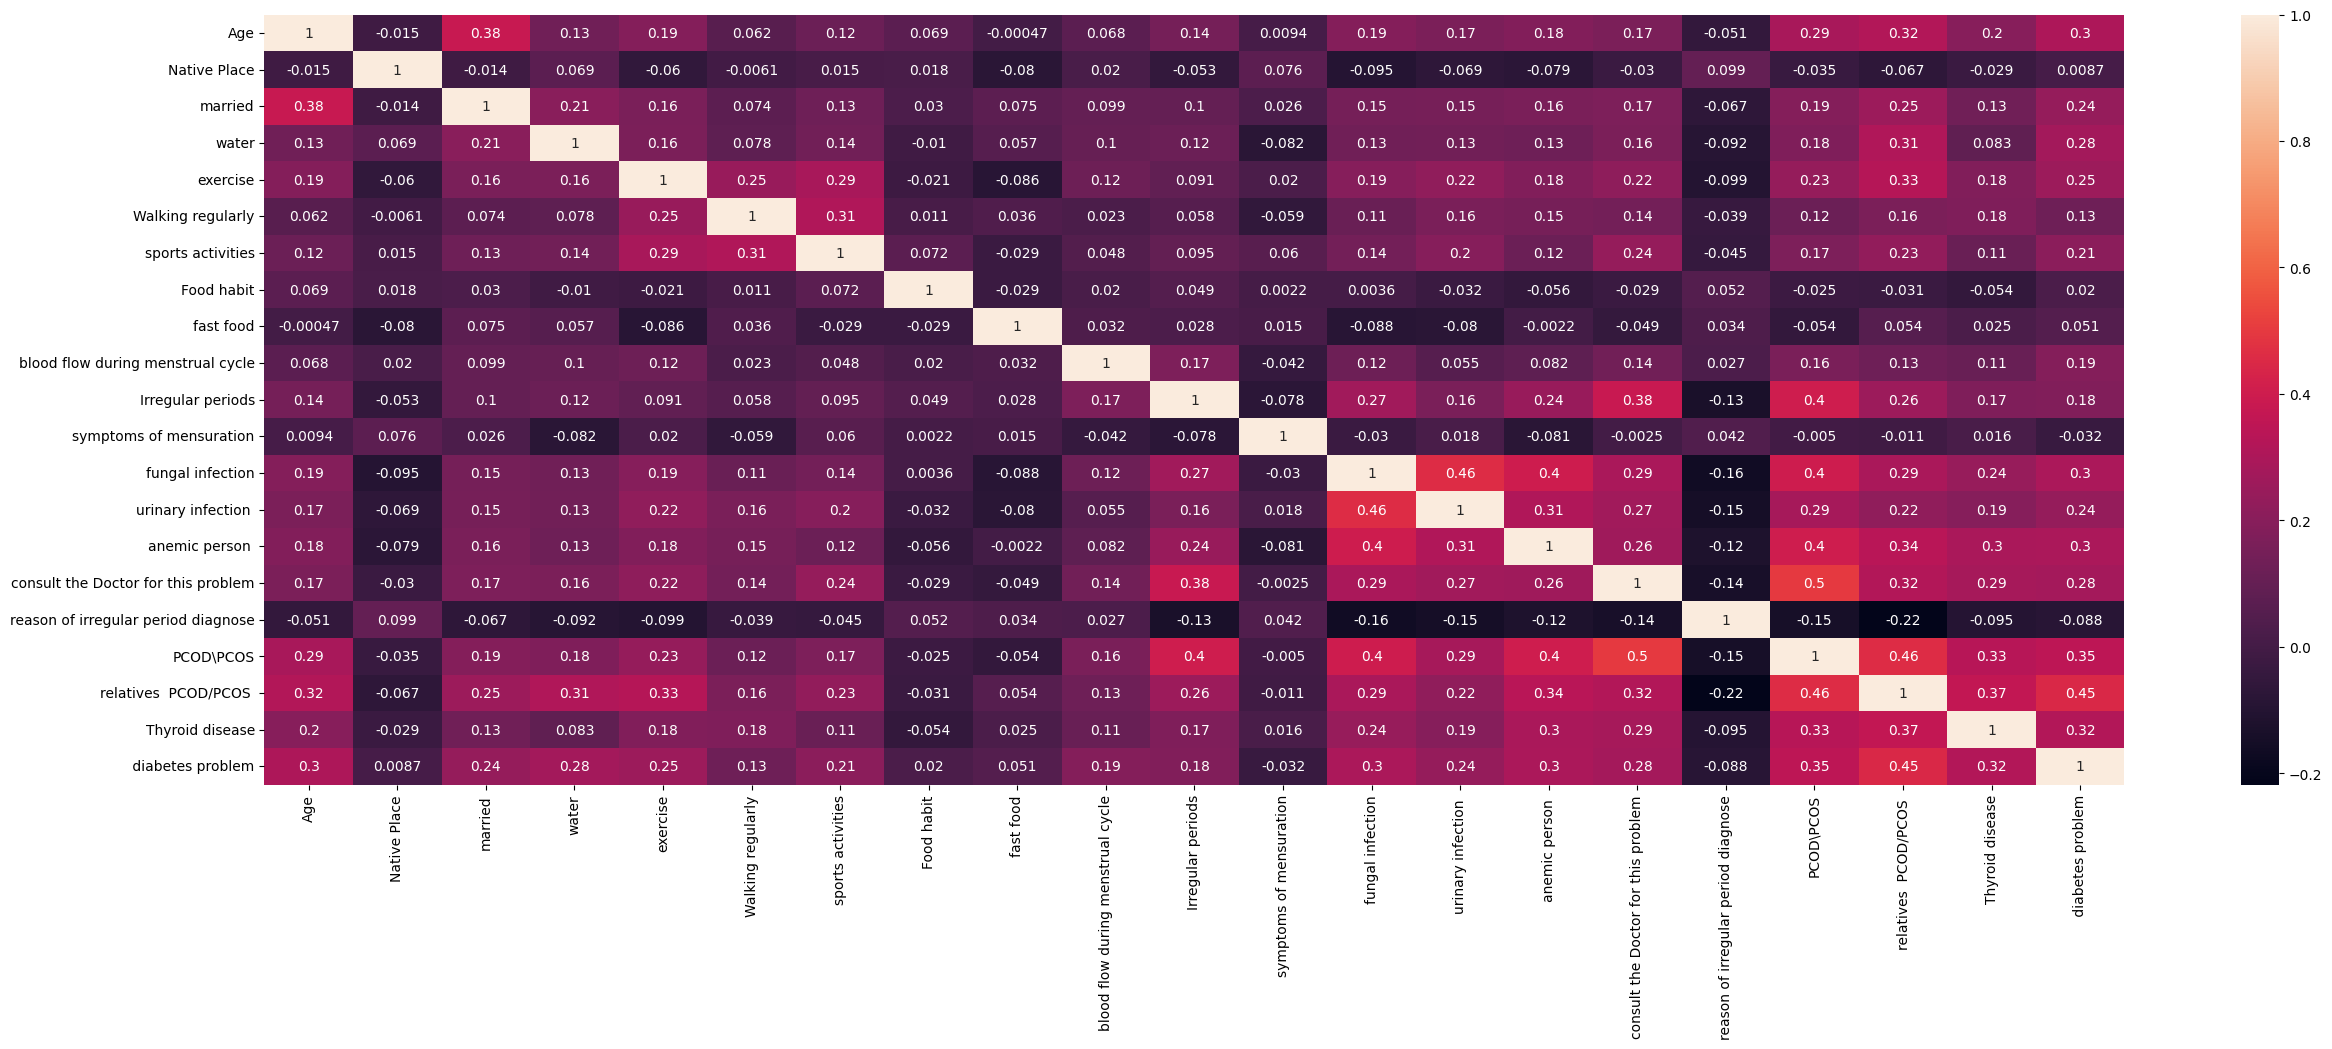

In [ ]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
IV=['Age','exercise', 'fungal infection', 'urinary infection ', 'sports activities', 'Food habit', 'fast food',
       'blood flow during menstrual cycle', 'Irregular periods',
       'anemic person ', 'consult the Doctor for this problem','relatives  PCOD/PCOS ', 'Thyroid disease', ' diabetes problem']
DV=['PCOD\PCOS']

In [ ]:
X=df.loc[:,IV].values
y=df.loc[:,DV].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
print("No.of X_train data: ", X_train.shape)
print("No.of y_train data: ", y_train.shape)
print("No.of X_test data: ", X_test.shape)
print("No.of y_test data: ", y_test.shape)

No.of X_train data:  (437, 14)
No.of y_train data:  (437, 1)
No.of X_test data:  (188, 14)
No.of y_test data:  (188, 1)


# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
train_score = lr.score(X_train, y_train)
print("Training score:", train_score)
test_score = lr.score(X_test, y_test)
print("Test score:", test_score)


Training score: 0.8741418764302059
Test score: 0.8457446808510638


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve,classification_report
y_pred=lr.predict(X_test)
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("\n")
print("accuracy",accuracy_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

confusion matrix [[138   8]
 [ 21  21]]


accuracy 0.8457446808510638
recall 0.5
precision 0.7241379310344828
f1_score 0.591549295774648


In [ ]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7226027397260275

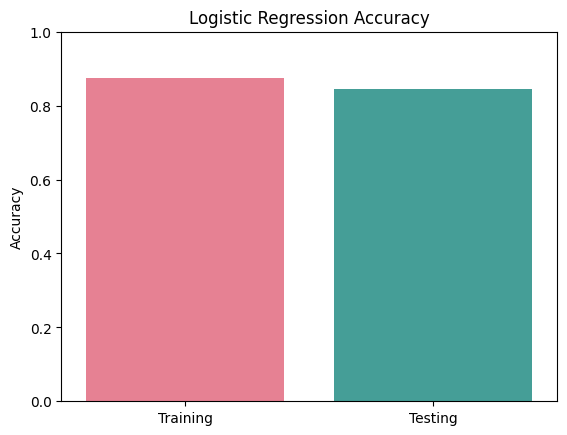

In [ ]:
train_acc=lr.score(X_train,y_train)
test_acc=lr.score(X_test,y_test)
sns.barplot(x=['Training','Testing'],y=[train_acc,test_acc],palette="husl",)
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

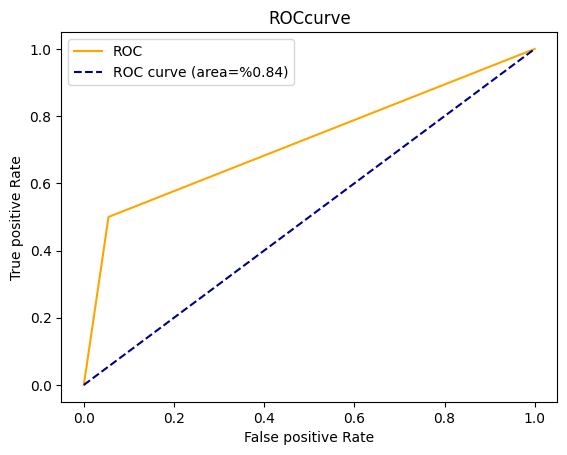

In [ ]:

auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresolds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color="orange",label="ROC")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="ROC curve (area=%0.84)")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROCcurve")
plt.legend()
plt.show()

#Decison Tree

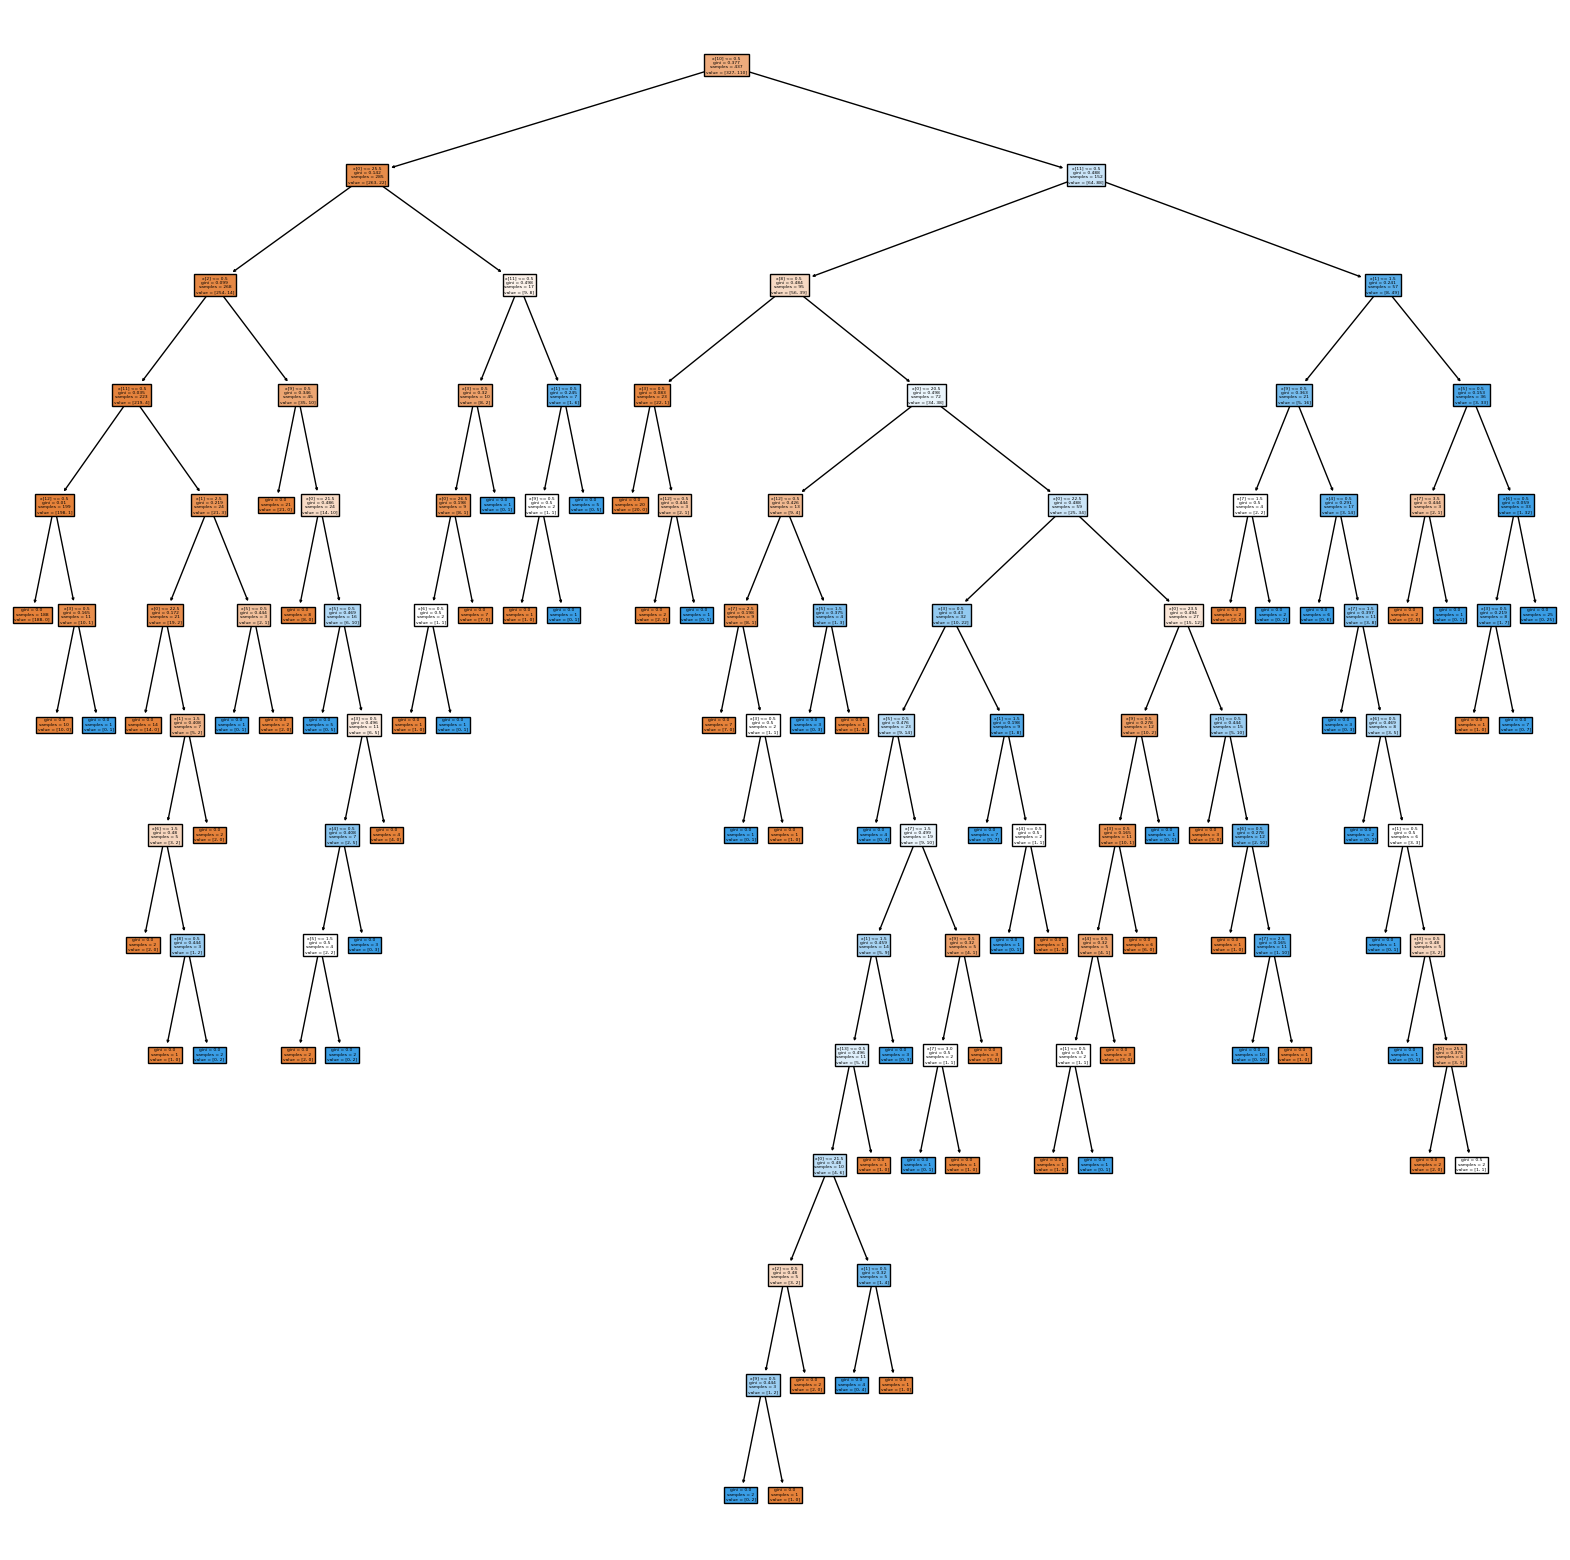

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

In [ ]:
print("Accuracy on traininng: ",dt.score(X_train,y_train))
print("Accuracy on testing: ",dt.score(X_test,y_test))

Accuracy on traininng:  0.9977116704805492
Accuracy on testing:  0.8617021276595744


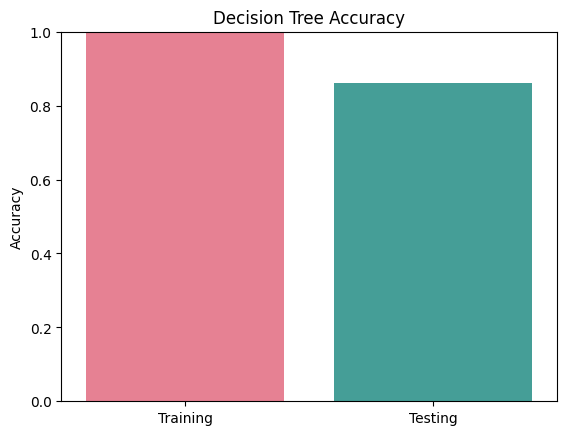

In [ ]:

train_acc=dt.score(X_train,y_train)
test_acc=dt.score(X_test,y_test)
sns.barplot(x=['Training','Testing'],y=[train_acc,test_acc],palette="husl",)
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy')
plt.show()

In [ ]:
y_pred=dt.predict(X_test)
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("\n")
print("accuracy",accuracy_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

confusion matrix: [[136  10]
 [ 16  26]]


accuracy 0.8617021276595744
recall 0.6190476190476191
precision 0.7222222222222222
f1_score 0.6666666666666666


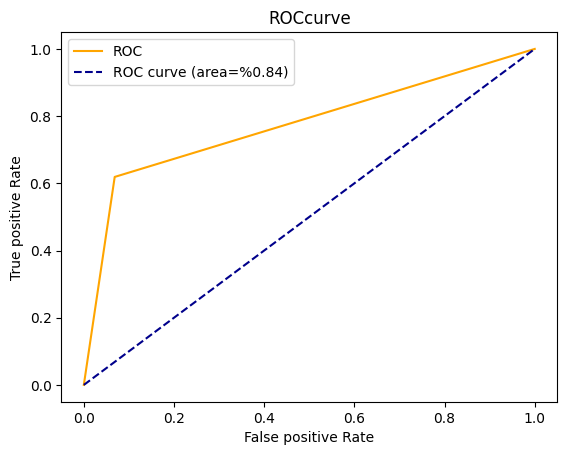

In [ ]:

auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresolds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color="orange",label="ROC")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="ROC curve (area=%0.84)")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROCcurve")
plt.legend()
plt.show()

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train.ravel())
print("Accuracy on traininng: ",rf.score(X_train,y_train))
print("Accuracy on traininng: ",rf.score(X_test,y_test))

Accuracy on traininng:  0.9977116704805492
Accuracy on traininng:  0.8670212765957447


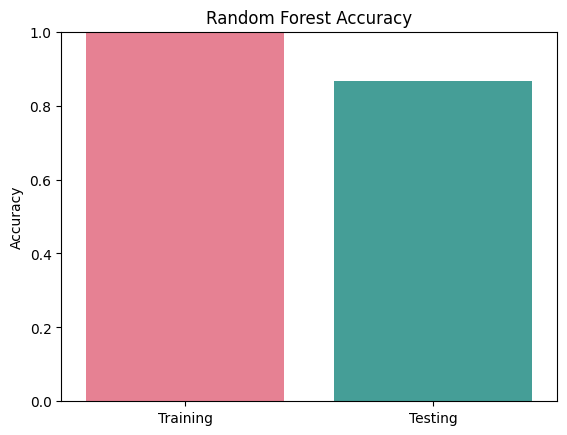

In [ ]:

train_acc=rf.score(X_train,y_train)
test_acc=rf.score(X_test,y_test)

sns.barplot(x=['Training','Testing'],y=[train_acc,test_acc],palette="husl",)
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()



In [ ]:
y_pred=rf.predict(X_test)
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("\n")
print("accuracy",accuracy_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

confusion matrix [[137   9]
 [ 16  26]]


accuracy 0.8670212765957447
recall 0.6190476190476191
precision 0.7428571428571429
f1_score 0.6753246753246753


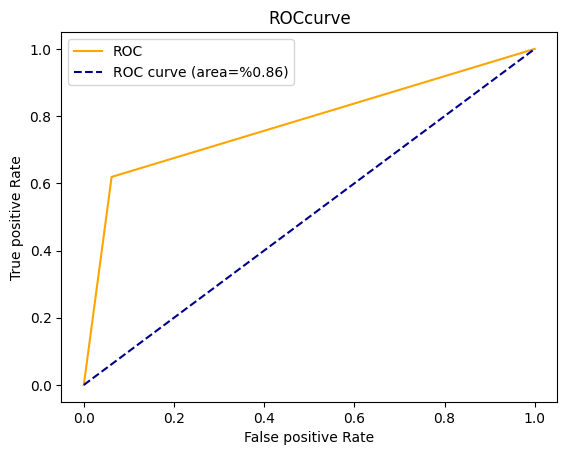

In [ ]:

auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresolds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color="orange",label="ROC")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="ROC curve (area=%0.86)")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROCcurve")
plt.legend()
plt.show()

#Gausian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Acuuracy on training:",nb.score(X_train,y_train))
print("Acuuracy on testing:",nb.score(X_test,y_test))

Acuuracy on training: 0.8352402745995423
Acuuracy on testing: 0.7978723404255319


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


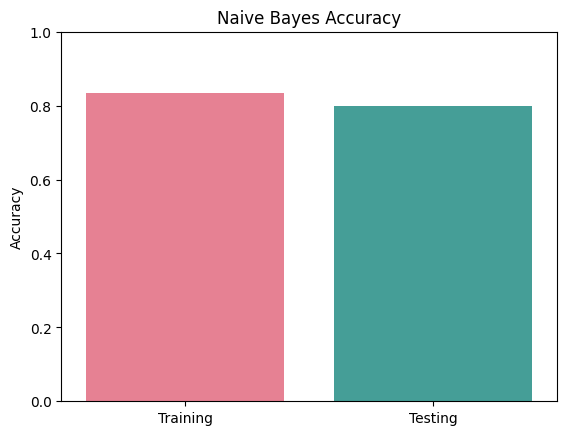

In [ ]:

train_acc=nb.score(X_train,y_train)
test_acc=nb.score(X_test,y_test)

sns.barplot(x=['Training','Testing'],y=[train_acc,test_acc],palette="husl",)
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()

In [ ]:
y_pred=nb.predict(X_test)
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("\n")
print("accuracy",accuracy_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

confusion matrix [[128  18]
 [ 20  22]]


accuracy 0.7978723404255319
recall 0.5238095238095238
precision 0.55
f1_score 0.5365853658536585


#compare models

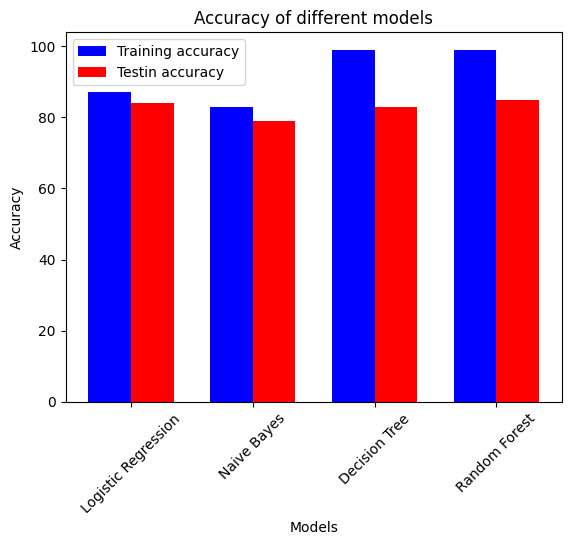

In [ ]:
models=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest']
train_acc=[87,83,99,99]
test_acc=[84,79,83,85]
bar_width=0.35

x_train=[i-bar_width/2 for i in range(len(models))]
x_test=[i+bar_width/2 for i in range(len(models))]

plt.bar(x_train,train_acc,width=bar_width,label='Training accuracy',color='blue')
plt.bar(x_test,test_acc,width=bar_width,label='Testin accuracy',color='red')

plt.title('Accuracy of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(range(len(models)),models,rotation=45)
plt.legend()
plt.show()